In [1]:
#Importing modules:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
#Package for flattening json in pandas dataframe
from pandas.io.json import json_normalize

In [2]:
#load json object
with open('../data/food_recall_data.json') as raw_data:
    data = json.load(raw_data)


In [3]:
#Putting data into a pandas df
#Looking at food_recall_data.json
#It shoes parent node is "results"
entire_df = json_normalize(data['results'])
entire_df.head(5)

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,...,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated
0,748 S Alameda St,,20120926,Los Angeles,Class II,not available.,United States,California,63150,E-Mail,...,Food,M & K Trading is recalling Korean Molluscan Sh...,20120921,F-2396-2012,M & K Trading Inc,20121003,CA,Terminated,20120926,Voluntary: Firm Initiated
1,4401 Foxdale St,,20120924,Irwindale,Class I,"UPC 7774523746, Use by dates 9/8/2012 or earli...",United States,Nationwide to following US States and Canada: ...,63062,Press Release,...,Food,"Firm is voluntarily recalling, out of an abund...",20120831,F-2382-2012,Ready Pac Foods Inc,20121003,CA,Terminated,20121025,Voluntary: Firm Initiated
2,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-30871-33001-2, Item # 0291710.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2438-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated
3,2315 Moore Ave,,20120927,Fullerton,Class II,"UPC 0-52334-11659-9, Item # 0291661.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2436-2012,Pulmuone Wildwood Inc,20121003,CA,Terminated,20121217,Voluntary: Firm Initiated
4,1720 Locust Grove Road,,20120921,Manheim,Class II,"No codes; all product ""Purchase by date shown ...",United States,Product was distributed to specific wholesale ...,62465,Telephone,...,Food,FDA samples of product tested positive for Fum...,20120417,F-2374-2012,Haldeman Mills,20121003,PA,Terminated,20130716,Voluntary: Firm Initiated


In [4]:
entire_df[["center_classification_date","report_date","termination_date"]] = entire_df[["center_classification_date","report_date","termination_date"]].apply(pd.to_datetime)

In [5]:
entire_df.head()

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,...,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated
0,748 S Alameda St,,2012-09-26,Los Angeles,Class II,not available.,United States,California,63150,E-Mail,...,Food,M & K Trading is recalling Korean Molluscan Sh...,20120921,F-2396-2012,M & K Trading Inc,2012-10-03,CA,Terminated,2012-09-26,Voluntary: Firm Initiated
1,4401 Foxdale St,,2012-09-24,Irwindale,Class I,"UPC 7774523746, Use by dates 9/8/2012 or earli...",United States,Nationwide to following US States and Canada: ...,63062,Press Release,...,Food,"Firm is voluntarily recalling, out of an abund...",20120831,F-2382-2012,Ready Pac Foods Inc,2012-10-03,CA,Terminated,2012-10-25,Voluntary: Firm Initiated
2,2315 Moore Ave,,2012-09-27,Fullerton,Class II,"UPC 0-30871-33001-2, Item # 0291710.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2438-2012,Pulmuone Wildwood Inc,2012-10-03,CA,Terminated,2012-12-17,Voluntary: Firm Initiated
3,2315 Moore Ave,,2012-09-27,Fullerton,Class II,"UPC 0-52334-11659-9, Item # 0291661.",United States,Nationwide and Canada.,62991,Letter,...,Food,The firm recalled due to a potential non-safet...,20120712,F-2436-2012,Pulmuone Wildwood Inc,2012-10-03,CA,Terminated,2012-12-17,Voluntary: Firm Initiated
4,1720 Locust Grove Road,,2012-09-21,Manheim,Class II,"No codes; all product ""Purchase by date shown ...",United States,Product was distributed to specific wholesale ...,62465,Telephone,...,Food,FDA samples of product tested positive for Fum...,20120417,F-2374-2012,Haldeman Mills,2012-10-03,PA,Terminated,2013-07-16,Voluntary: Firm Initiated


In [6]:
entire_df.columns

Index(['address_1', 'address_2', 'center_classification_date', 'city',
       'classification', 'code_info', 'country', 'distribution_pattern',
       'event_id', 'initial_firm_notification', 'more_code_info',
       'postal_code', 'product_description', 'product_quantity',
       'product_type', 'reason_for_recall', 'recall_initiation_date',
       'recall_number', 'recalling_firm', 'report_date', 'state', 'status',
       'termination_date', 'voluntary_mandated'],
      dtype='object')

In [37]:
entire_df.describe()

,address_1,address_2,center_classification_date,city,classification,code_info,country,distribution_pattern,event_id,initial_firm_notification,...,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,state,status,termination_date,voluntary_mandated
count,17621,17621,17589,17621,17621,17621,17621,17621,17621,17621,...,17621,17621,17621,17621,17621,17621,17621,17621,15642,17621
unique,3100,186,1406,1446,4,11768,22,3449,4285,9,...,1,4999,1752,17587,3137,351,59,3,1292,3
top,726 S 12th St.,,2017-08-17 00:00:00,Milwaukee,Class II,all lot codes within expiry,United States,Nationwide,77194,"Two or more of the following: Email, Fax, Lett...",...,Food,Product may contain undeclared milk.,20170503,,"Garden-Fresh Foods, Inc.",2017-07-26 00:00:00,CA,Terminated,2016-02-03 00:00:00,Voluntary: Firm Initiated
freq,629,16794,375,635,8874,259,17480,620,369,6550,...,17621,615,380,33,633,438,2242,15688,356,17309
first,NaN,NaN,2012-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2012-06-20 00:00:00,NaN,NaN,2012-06-08 00:00:00,NaN
last,NaN,NaN,2019-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2019-03-20 00:00:00,NaN,NaN,2019-03-22 00:00:00,NaN


In [7]:
#Data clean up:
clean_df = entire_df.loc[:,["recalling_firm","product_type","country","state","report_date","termination_date","status","voluntary_mandated","classification"]]
clean_df.head()

,recalling_firm,product_type,country,state,report_date,termination_date,status,voluntary_mandated,classification
0,M & K Trading Inc,Food,United States,CA,2012-10-03,2012-09-26,Terminated,Voluntary: Firm Initiated,Class II
1,Ready Pac Foods Inc,Food,United States,CA,2012-10-03,2012-10-25,Terminated,Voluntary: Firm Initiated,Class I
2,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II
3,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II
4,Haldeman Mills,Food,United States,PA,2012-10-03,2013-07-16,Terminated,Voluntary: Firm Initiated,Class II


In [8]:
clean_df['year_reported'] = pd.DatetimeIndex(clean_df['report_date']).year
clean_df.head()

,recalling_firm,product_type,country,state,report_date,termination_date,status,voluntary_mandated,classification,year_reported
0,M & K Trading Inc,Food,United States,CA,2012-10-03,2012-09-26,Terminated,Voluntary: Firm Initiated,Class II,2012
1,Ready Pac Foods Inc,Food,United States,CA,2012-10-03,2012-10-25,Terminated,Voluntary: Firm Initiated,Class I,2012
2,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II,2012
3,Pulmuone Wildwood Inc,Food,United States,CA,2012-10-03,2012-12-17,Terminated,Voluntary: Firm Initiated,Class II,2012
4,Haldeman Mills,Food,United States,PA,2012-10-03,2013-07-16,Terminated,Voluntary: Firm Initiated,Class II,2012


AttributeError: 'DataFrame' object has no attribute 'recall_number'

In [10]:
year_reported_df = clean_df["year_reported"].value_counts()
year_reported_df

2017    3187
2016    3012
2015    2835
2014    2259
2013    2108
2012    1916
2018    1905
2019     399
Name: year_reported, dtype: int64

In [11]:
firm_count_df = clean_df['recalling_firm'].value_counts()
firm_count_df

Garden-Fresh Foods, Inc.                            633
Newly Weds Foods Inc                                381
Good Herbs, Inc.                                    353
Blue Bell Creameries, L.P.                          292
Reser's Fine Foods, Inc.                            219
Sunland, Incorporated                               219
Whole Foods Market                                  214
Target Corporation                                  199
High Liner Foods Inc.                               187
Sunset Natural Products Inc.                        173
Health One Pharmaceuticals Inc                      147
Spartan Central Kitchen                             140
Jeni's Splendid Ice Creams LLC                      134
SunBurst Foods, Inc.                                121
Snoqualmie Gourmet Ice Cream                        117
Numbskull LLC                                       115
Rabbit Creek Products Inc.                          114
Iowa Select Herbs LLC                           

In [12]:
classification_count_df = clean_df["classification"].value_counts()
classification_count_df.head()

Class II              8874
Class I               7707
Class III             1009
Not Yet Classified      31
Name: classification, dtype: int64

In [13]:
state_group= clean_df.groupby(['state'])
stateCount = state_group.count()
stateCount

,recalling_firm,product_type,country,report_date,termination_date,status,voluntary_mandated,classification,year_reported
state,,,,,,,,,
,127,127,127,127,112,127,127,127,127
AK,54,54,54,54,54,54,54,54,54
AL,28,28,28,28,26,28,28,28,28
AR,32,32,32,32,27,32,32,32,32
AZ,150,150,150,150,147,150,150,150,150
Alberta,2,2,2,2,2,2,2,2,2
British Columbia,1,1,1,1,1,1,1,1,1
CA,2242,2242,2242,2242,2124,2242,2242,2242,2242
CO,197,197,197,197,183,197,197,197,197


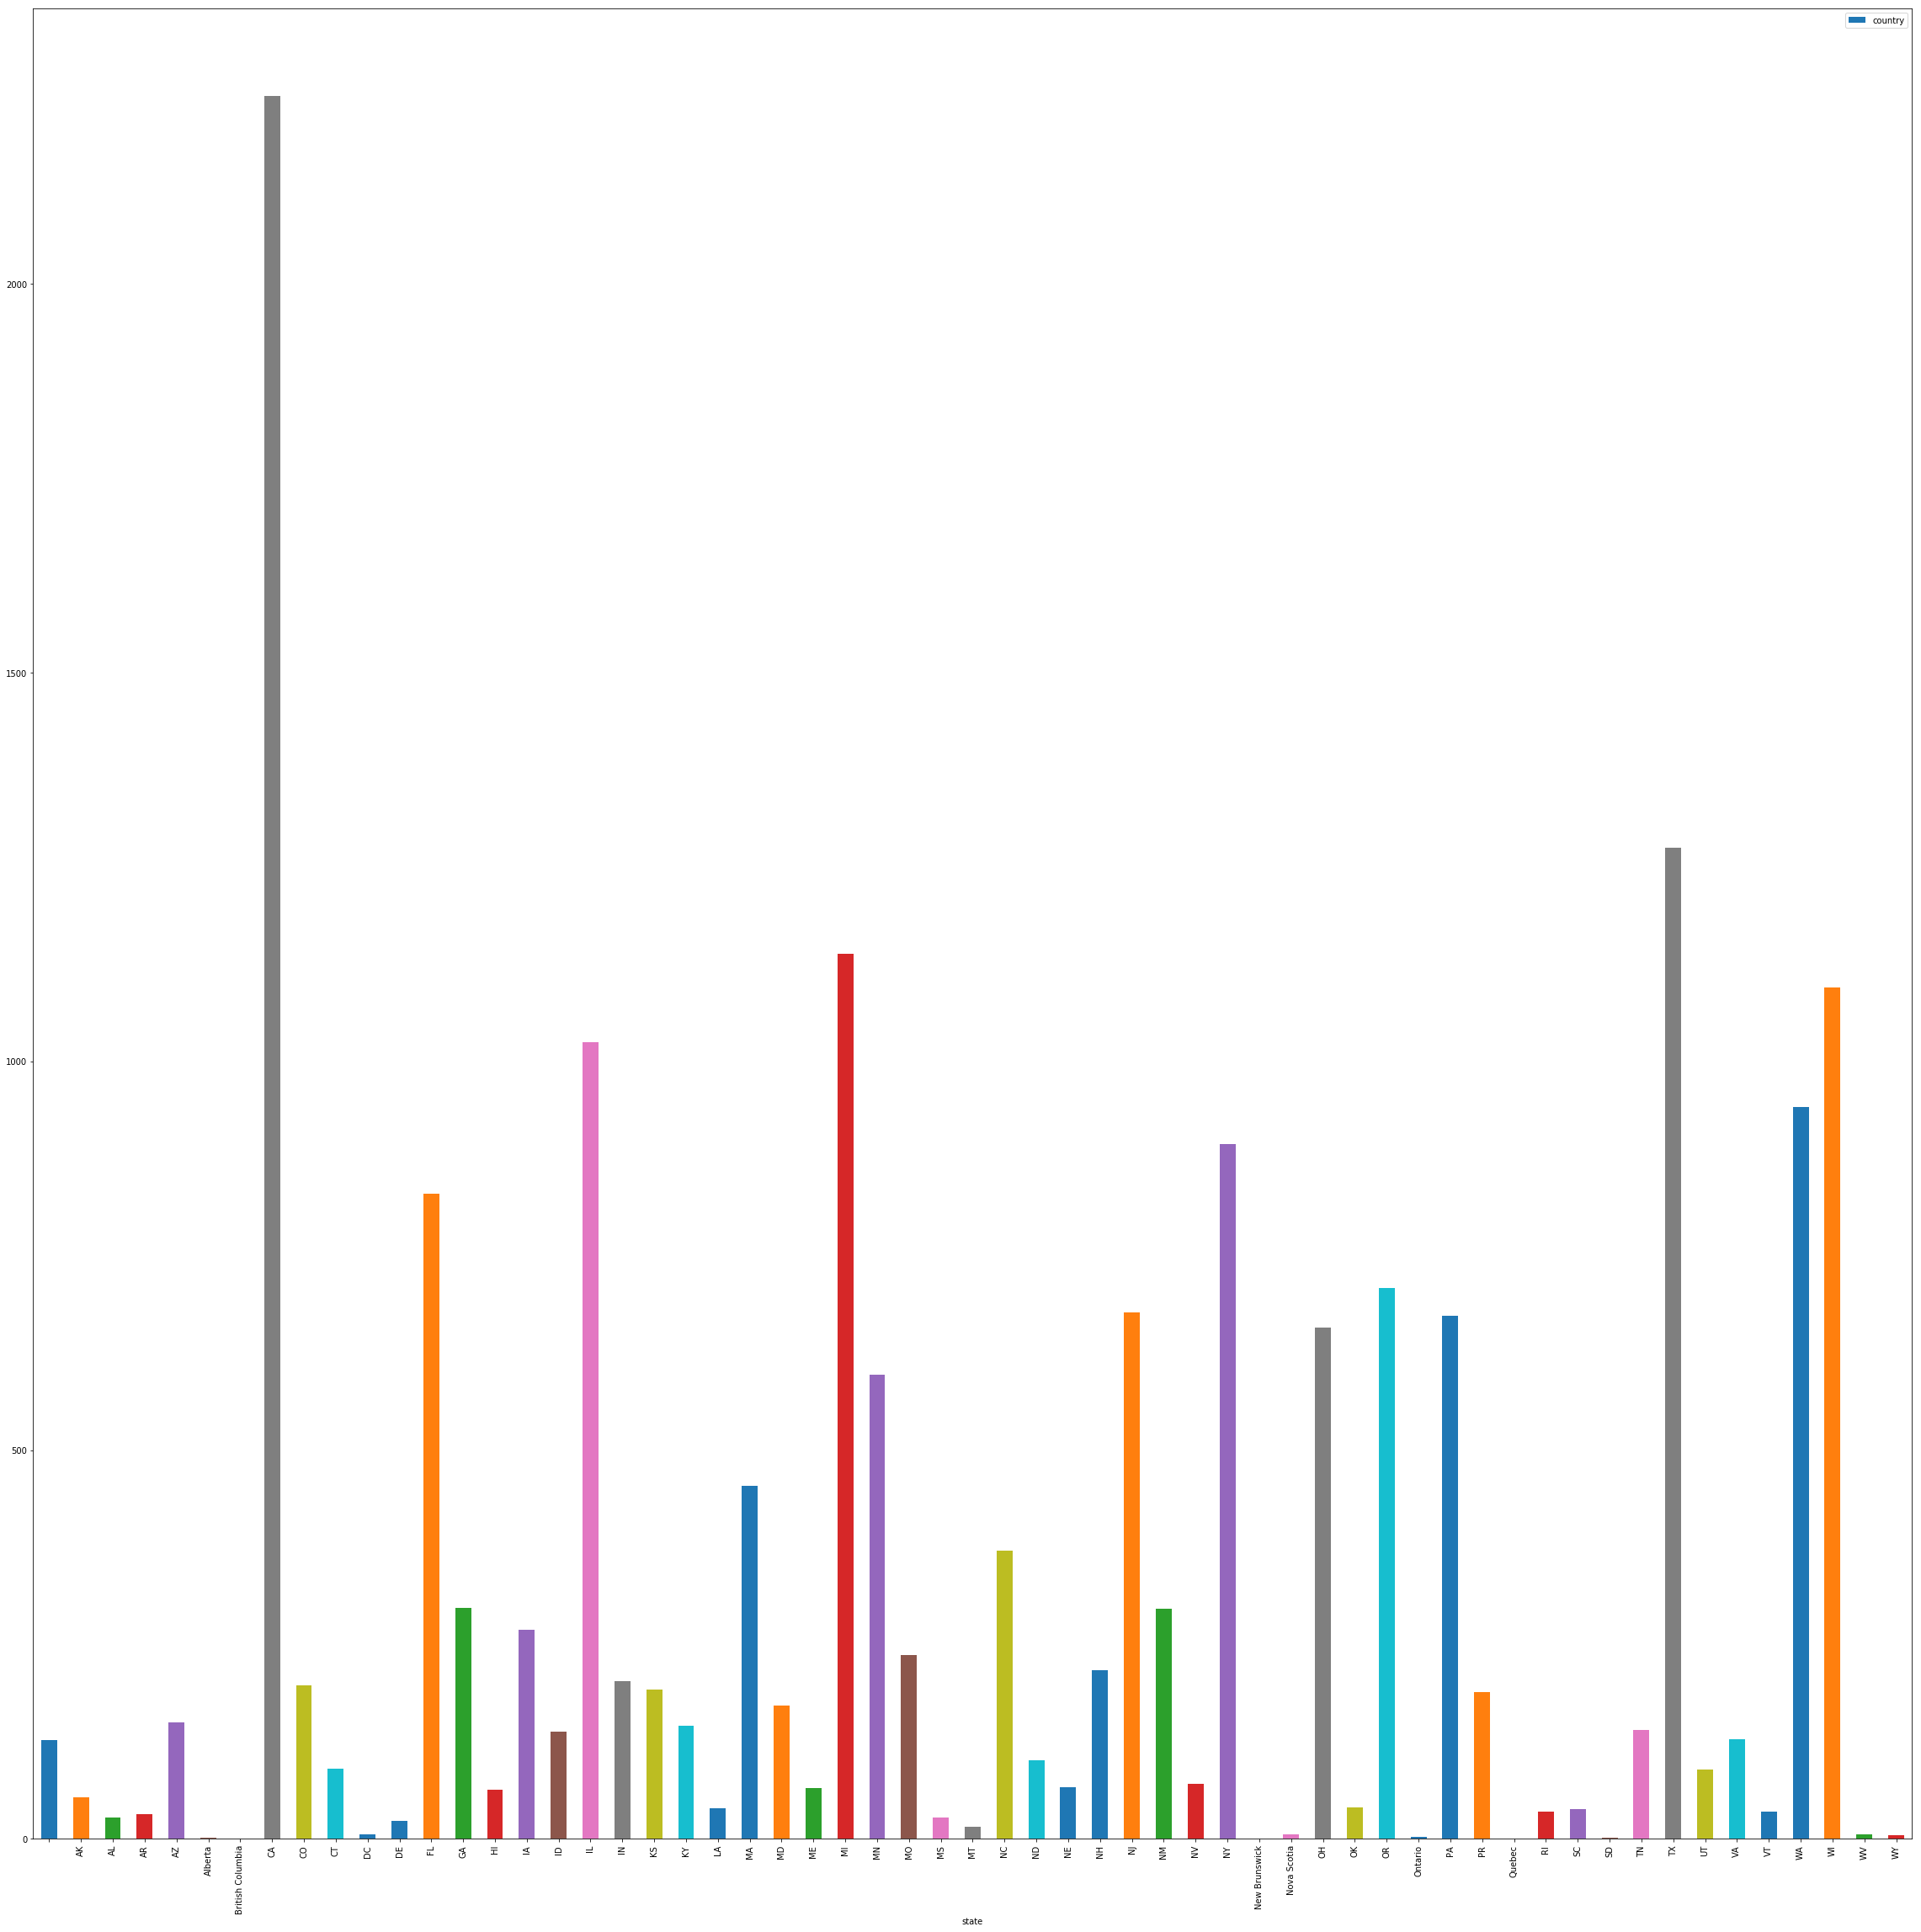

In [14]:

splot = stateCount.plot.bar(y='country', figsize=(40, 40))

In [15]:
country_group= clean_df.groupby(['country'])
countryCount = country_group.count()
countryCount

,recalling_firm,product_type,state,report_date,termination_date,status,voluntary_mandated,classification,year_reported
country,,,,,,,,,
Armenia,4,4,4,4,4,4,4,4,4
Australia,1,1,1,1,1,1,1,1,1
Belgium,1,1,1,1,0,1,1,1,1
Canada,75,75,75,75,63,75,75,75,75
Chile,5,5,5,5,5,5,5,5,5
China,1,1,1,1,1,1,1,1,1
Costa Rica,2,2,2,2,2,2,2,2,2
Dominican Republic (the),1,1,1,1,1,1,1,1,1
Egypt,3,3,3,3,3,3,3,3,3


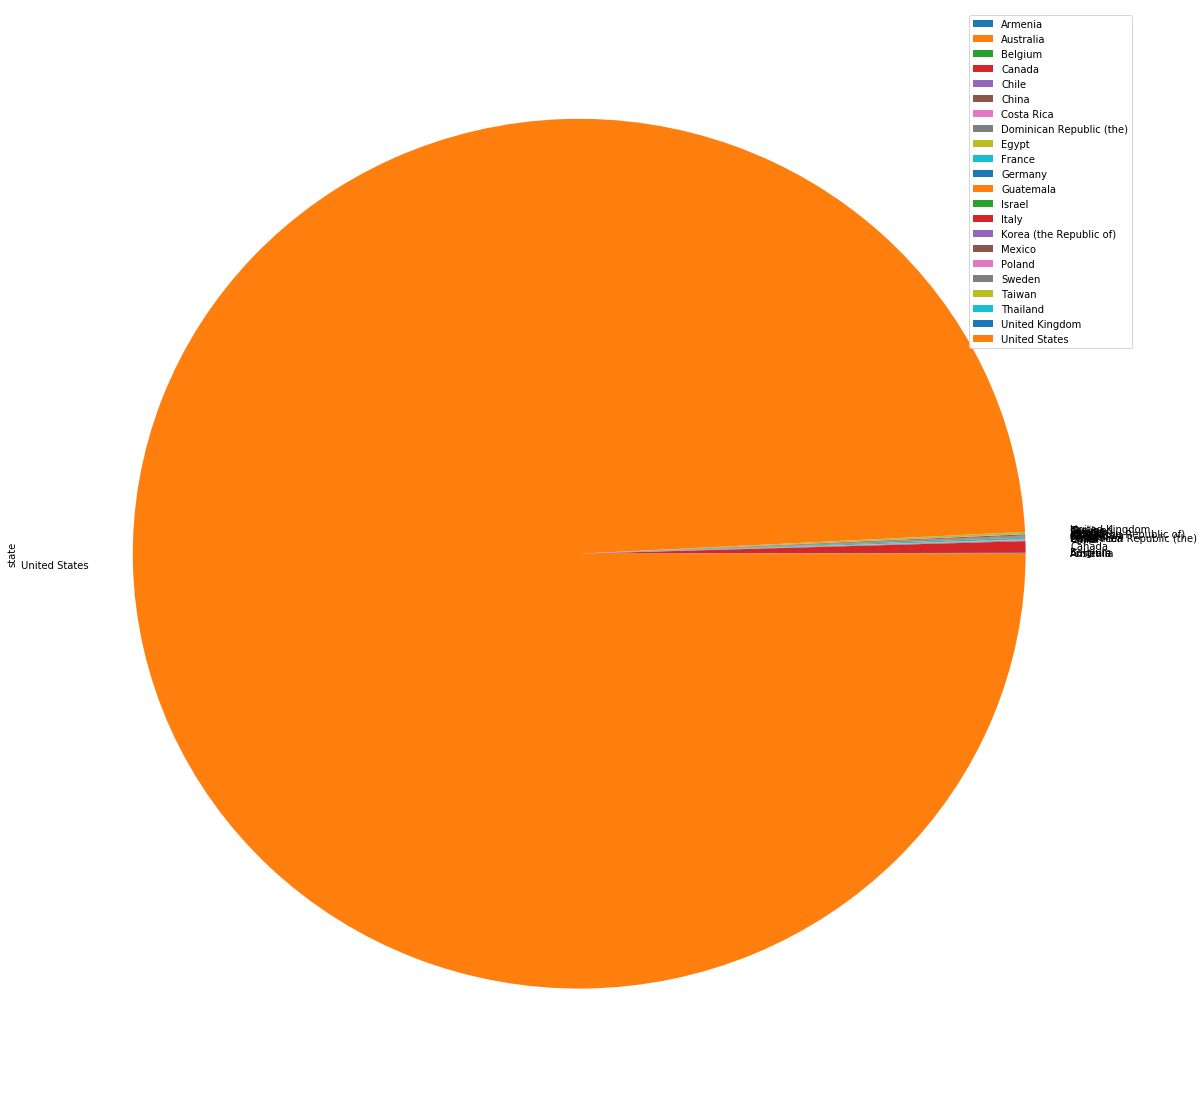

In [16]:
countryplot = countryCount.plot.pie(y='state', figsize=(20, 20))

In [17]:
yearly_count_df = clean_df["year_reported"].value_counts()
yearly_count_df.head()

2017    3187
2016    3012
2015    2835
2014    2259
2013    2108
Name: year_reported, dtype: int64

In [18]:
status_count_df = clean_df['status'].value_counts()
status_count_df.head()


Terminated    15688
Ongoing        1731
Completed       202
Name: status, dtype: int64

In [19]:
vol_man_count_df = clean_df['voluntary_mandated'].value_counts()
vol_man_count_df.head()

Voluntary: Firm Initiated    17309
FDA Mandated                   310
Voluntary: FDA Requested         2
Name: voluntary_mandated, dtype: int64

In [20]:
# Create connection to SQL Database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../data/food_recall.sqlite', echo=False)

In [27]:
# Create new table on SQL databasedf.to_sql(name,con,flavor='sqlite',schema=None,if_exists='replace',index=True,index_label=None, chunksize=None, dtype=None)
clean_df.to_sql('food_recall', con=engine, if_exists='replace',index_col="Id")

TypeError: to_sql() got an unexpected keyword argument 'index_col'

In [28]:
query = "SELECT * FROM food_recall"  # String containing the SQL query

df = pd.read_sql_query(query, engine, index_col="Id")  # Using the first column as indices
df.head()

KeyError: 'Id'

In [29]:
#connect to the database


executescript('''
    PRAGMA foreign_keys=off;

    BEGIN TRANSACTION;
    ALTER TABLE table RENAME TO old_table;

    /*create a new table with the same column names and types while
    defining a primary key for the desired column*/
    CREATE TABLE new_table (col_1 TEXT PRIMARY KEY NOT NULL,
                            col_2 TEXT);

    INSERT INTO new_table SELECT * FROM old_table;

    DROP TABLE old_table;
    COMMIT TRANSACTION;

    PRAGMA foreign_keys=on;''')

#close out the connection
c.close()
conn.close()

NameError: name 'executescript' is not defined

In [ ]:
engine.execute('SELECT * FROM food_recall').fetchall()